In [49]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

<Item title:"ARCHIVE_SAC_Management_Action_Tracking" type:Feature Layer Collection owner:Anooshi>
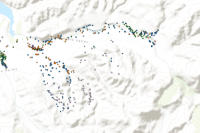

In [16]:
# Load data from arcGIS online
output = arcGIS_data_load('a0f0d1db782346f691c70f651ea343c5')

data = output['data0']

feature_service = output['feature_service']

In [17]:
data.head(5)


,OBJECTID_1,BHR_Site,Surveyor1,Surveyor2,Habitat,Phenology,TreatType,Herbicide,Contractor,TreatNotes,DateTreat,PctCover,PatchSize,GlobalID_2,PlantSpecies,CompType,Patch_ID,Acres_Treated,SHAPE
0,1,SAC,None,None,Sycamore Riparian,None,None,None,None,None,NaT,NaN,NaN,e7f6eabc-83b0-4c49-bdf5-5050d226027e,Rubus armeniacus,Rehabilitate,1,NaN,"{'x': 6191022.362146303, 'y': 2037227.47474648..."
1,2,SAC,None,None,Sycamore Riparian,None,None,None,None,None,NaT,NaN,NaN,65dba9f5-5ca1-40bd-ace1-39a216d74f77,Rubus armeniacus,Rehabilitate,2,NaN,"{'x': 6191031.725644633, 'y': 2037378.95213380..."
2,3,SAC,None,None,Sycamore Riparian,None,None,None,None,None,NaT,NaN,NaN,0e7ef899-652f-4b9e-a992-f906735c9ed9,Rubus armeniacus,Rehabilitate,3,NaN,"{'x': 6189784.797036141, 'y': 2037795.18883414..."
3,4,SAC,None,None,Sycamore Riparian,None,None,None,None,None,NaT,NaN,NaN,c363f25c-a062-496e-9a8b-33c2e442d7e9,Rubus armeniacus,Rehabilitate,4,NaN,"{'x': 6189529.866443634, 'y': 2037796.04611589..."
4,5,SAC,None,None,Developed,None,None,None,None,None,NaT,NaN,NaN,90c19561-10ea-4824-b907-26bfbc119971,Rubus armeniacus,Not Applicable,5,NaN,"{'x': 6188116.672747716, 'y': 2038081.10099197..."


In [63]:
df1 = data[(data.PlantSpecies == 'Aegilops triuncialis') & (data.TreatType == 'Mowing') | (data.PlantSpecies == 'Conium maculatum') & (data.TreatType == 'Mowing')]

In [64]:
df1.TreatType.value_counts()

Mowing    99
Name: TreatType, dtype: int64

In [68]:
df1['Date'] = df1.DateTreat.dt.floor('d')

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['2018-06-29T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-06-08T00:00:00.000000000',
       '2018-06-19T00:00:00.000000000',                           'NaT',
       '2018-07-03T00:00:00.000000000', '2018-07-05T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-04-03T00:00:00.000000000',
       '2019-04-04T00:00:00.000000000', '2019-05-29T00:00:00.000000000',
       '2019-05-30T00:00:00.000000000', '2019-05-31T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-06-06T00:00:00.000000000',
       '2019-06-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [81]:
df2 = df1.groupby(['PlantSpecies', 'TreatType', 'Date']).count().reset_index()

In [82]:
df2.Date.count()

16